# This notebook aims to predict house prices using the popular dataset 'House Prices - Advanced Regression Techniques' on Kaggle.
## Going to do some exploratory data analysis to start with as always, then will get started on some regression techniques.
### https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
### Some predictions at the end using mlr model and tensorflow neural network.

#### Load libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

#### Load train data and explore

In [4]:
train = pd.read_csv('train.csv')

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
#Analayse the all important variable, sale price
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


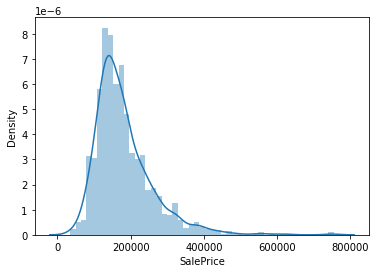

In [8]:
sns.distplot(train['SalePrice'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


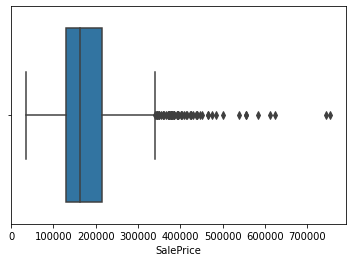

In [9]:
sns.boxplot(train['SalePrice'])

Determine correlation between quantitative variables

In [10]:
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

Assess null values and fill

In [11]:
train.isnull().any().head(20)

Id              False
MSSubClass      False
MSZoning        False
LotFrontage      True
LotArea         False
Street          False
Alley            True
LotShape        False
LandContour     False
Utilities       False
LotConfig       False
LandSlope       False
Neighborhood    False
Condition1      False
Condition2      False
BldgType        False
HouseStyle      False
OverallQual     False
OverallCond     False
YearBuilt       False
dtype: bool

In [12]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

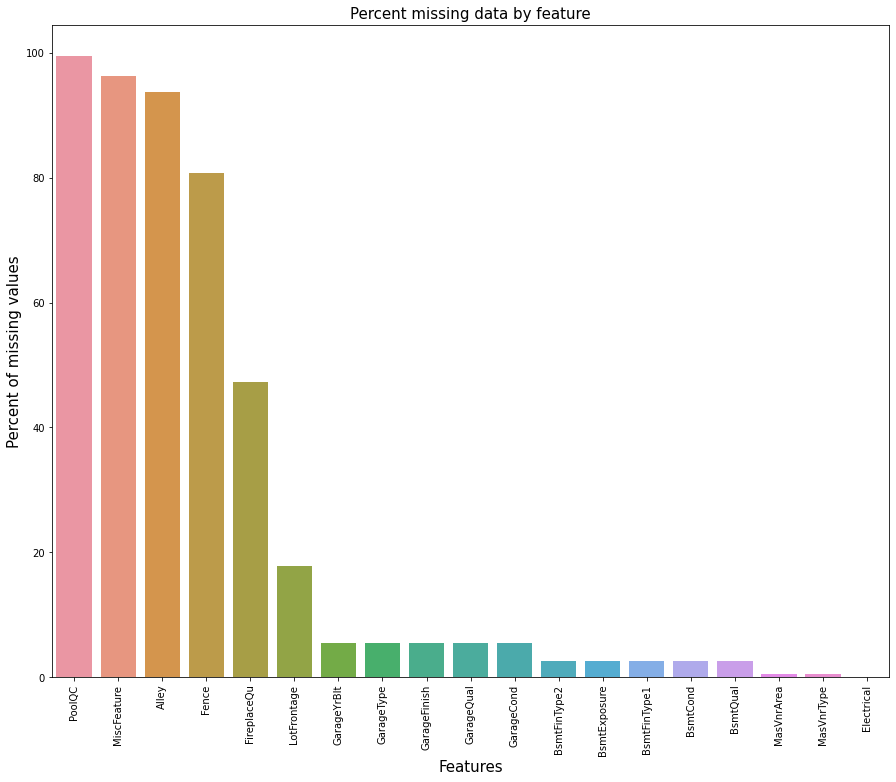

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

Since na values means 'nothing' for following columns:

In [14]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', "PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType", 'MSSubClass'):
    train[col] = train[col].fillna('None')

Fill null values of lot frontage with median for neighbourhood

In [15]:
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

Since null values of following columns (likely) means zero

In [16]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', "MasVnrArea"):
    train[col] = train[col].fillna(0)

fill zoning with most common values for column

In [17]:
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])

data description says null likely means typical

In [18]:
train["Functional"] = train["Functional"].fillna("Typ")

In [19]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

In [20]:
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])

Check any remaining null values

In [21]:
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio


All good

### Some more feature engineerign

Utilities column won't help, therefore removed

In [22]:
train = train.drop(['Utilities'], axis=1)

In [23]:
train = pd.get_dummies(train)

#### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
feature_columns = train.columns[train.columns != 'SalePrice']
features = train[feature_columns]

In [26]:
labels = train['SalePrice']

In [27]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.33, random_state=42)

#### Column Transformer to scale data

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer

In [29]:
ct = ColumnTransformer([('normalize', Normalizer(), feature_columns)], remainder='passthrough')

In [30]:
features_train_norm = ct.fit_transform(features_train) 

In [31]:
features_test_norm = ct.transform(features_test)

In [32]:
features_train_norm = pd.DataFrame(features_train_norm, columns = feature_columns)
features_test_norm = pd.DataFrame(features_test_norm, columns = feature_columns)

### Mulitple Linear Regression
#### Simple mlr model using sklearn to get base predictions

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
mlr = LinearRegression()

In [35]:
model_mlr = mlr.fit(features_train_norm, labels_train)

In [36]:
y_mlr_predict = model_mlr.predict(features_test_norm)

Get scores for sklearn linearregression model

In [37]:
print("Train score:")
print(model_mlr.score(features_train_norm, labels_train))
print("Test score:")
print(model_mlr.score(features_test_norm, labels_test))

Train score:
0.8648888470308341
Test score:
0.7101347994853393


In [116]:
from sklearn.metrics import mean_absolute_error

In [119]:
mlr_mae = mean_absolute_error(labels_test, y_mlr_predict)
mlr_mae

27617.86228707701

Not bad, must be a fair bit of overfitting though

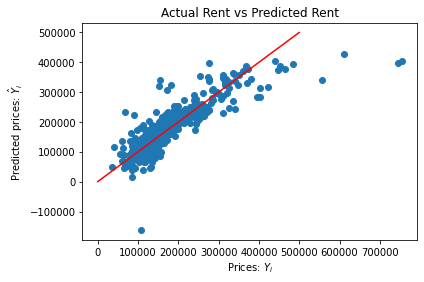

In [107]:
plt.scatter(labels_test, y_mlr_predict)
x = range(500000)
y = range(500000)
plt.plot(x, y , color='red')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

Can see greater skew towards the higher end of the price range. This is due to the limited data, and could be improved using gradient boosting.

### Create a regression model using Tensorflow

In [94]:
import tensorflow

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


Create a design model function to create neural network

In [88]:
def design_model():
  model = Sequential()
  input = InputLayer(input_shape=(features.shape[1],)) 
  model.add(input) 
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.2))
  model.add(Dense(24, activation = 'relu'))
  model.add(Dense(1)) 
  opt = Adam(learning_rate=0.01)
  model.compile(loss='mse',  metrics=['mae'], optimizer=opt)
  return model

Initial fit using random hyperparameters.

In [97]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [98]:
model = design_model()
model.fit(features_train_norm, labels_train, epochs=100, batch_size=16, callbacks=[es])

Epoch 1/100
62/62 [==============================] - 1s 2ms/step - loss: 37559540394.6667 - mae: 180250.7755
Epoch 2/100
62/62 [==============================] - 0s 2ms/step - loss: 15739373730.5397 - mae: 98233.1725
Epoch 3/100
62/62 [==============================] - 0s 2ms/step - loss: 6614577542.0952 - mae: 59325.7375
Epoch 4/100
62/62 [==============================] - 0s 2ms/step - loss: 6203003392.0000 - mae: 58027.9584
Epoch 5/100
62/62 [==============================] - 0s 2ms/step - loss: 6398389101.7143 - mae: 57904.6282
Epoch 6/100
62/62 [==============================] - 0s 2ms/step - loss: 4688888039.6190 - mae: 50068.9005
Epoch 7/100
62/62 [==============================] - 0s 2ms/step - loss: 5153635197.9683 - mae: 51377.4831
Epoch 8/100
62/62 [==============================] - 0s 2ms/step - loss: 4171065022.9841 - mae: 47533.1053
Epoch 9/100
62/62 [==============================] - 0s 2ms/step - loss: 3478873266.7937 - mae: 44395.0438
Epoch 10/100
62/62 [==============

Create a randomised grid search to find best hyperparameters

In [90]:
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

In [91]:
def do_randomised_search():
  param_grid = {'batch_size': sp_randint(2, 16), 'nb_epoch': sp_randint(50, 200)}
  model = KerasRegressor(build_fn=design_model)
  grid = RandomizedSearchCV(estimator = model, param_distributions=param_grid, scoring = make_scorer(mean_squared_error, greater_is_better=False), n_iter = 12)
  grid_result = grid.fit(features_train, labels_train, verbose = 0)
  print(grid_result)
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [92]:
do_randomised_search()

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f4c620c4ba8>,
                   iid='deprecated', n_iter=12, n_jobs=None,
                   param_distributions={'batch_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4c620c4668>,
                                        'nb_epoch': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4c620c4a58>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(mean_squared_error, greater_is_better=False),
                   verbose=0)
Best: -2808547779.845933 using {'batch_size': 2, 'nb_epoch': 177}
-3694215315.203906 (742055633.552070) with: {'batch_size': 11, 'nb_epoch': 50}
-2808547779.845933 (692030200.476643) with: {'batch_size': 2, 'nb_epoch': 177}
-4941267967.688120 (1944673306.358951) with: {'batch_size': 14, 'n

Best batch size: 2, best number of epochs: 177.

In [99]:
model.fit(features_train_norm, labels_train, epochs=177, batch_size=2, callbacks=[es])

Epoch 1/177
489/489 [==============================] - 1s 2ms/step - loss: 2011353728.0000 - mae: 31303.0000
Epoch 2/177
489/489 [==============================] - 1s 2ms/step - loss: 1968501888.0000 - mae: 30215.8691
Epoch 3/177
489/489 [==============================] - 1s 2ms/step - loss: 1910424064.0000 - mae: 29861.5332
Epoch 4/177
489/489 [==============================] - 1s 2ms/step - loss: 1916350464.0000 - mae: 30251.4902
Epoch 5/177
489/489 [==============================] - 1s 2ms/step - loss: 1789791488.0000 - mae: 29444.8418
Epoch 6/177
489/489 [==============================] - 1s 2ms/step - loss: 1906109824.0000 - mae: 29562.1797
Epoch 7/177
489/489 [==============================] - 1s 2ms/step - loss: 1808710400.0000 - mae: 28426.5215
Epoch 8/177
489/489 [==============================] - 1s 2ms/step - loss: 1777739392.0000 - mae: 29168.7520
Epoch 9/177
489/489 [==============================] - 1s 2ms/step - loss: 1934323968.0000 - mae: 30523.7480
Epoch 10/177
489/48

In [101]:
tf_predictions = model.predict(features_test_norm)

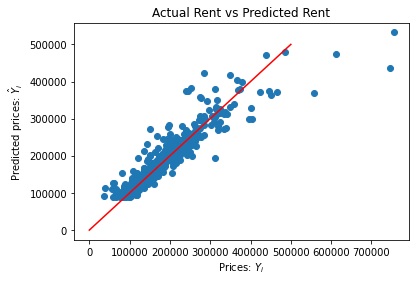

In [106]:
plt.scatter(labels_test, tf_predictions)
x = range(500000)
y = range(500000)
plt.plot(x, y , color='red')

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

plt.show()

In [120]:
tf_val_mse, tf_val_mae = model.evaluate(features_test_norm, labels_test, verbose=0)

In [121]:
tf_val_mae

20423.267578125

Not bad

#### Tensorflow model has a lower mae by about 7000 than mlr model.